In [1]:
#We import the necessary libraries.
%matplotlib inline

In [2]:
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from importlib import reload

In [4]:
import corner

In [5]:
import radvel

In [6]:
from matplotlib import rcParams

#We change the formatting of the plots.
    #rcParams["axes.formatter.useoffset"] = False => Disabling the automatic offset for tick labels, since its False
#full numbers will be displayed.
    #rcParams['axes.formatter.limits'] = -15,15 => If the tick labels are outside of range (-15, 15) Matplotlib will
#use Scientific Notation.
    #rcParams['mathtext.fontset'] = 'stix' => "STIX" font will be used for mathematical symbols, this font is used 
#in publications.
    #rcParams['font.family'] = 'STIXGeneral' => "STIXGeneral" is a part of the font family, ensures the text and
#labels also use this font.
    #rcParams['xtick.direction']='in' => This changes the direction of the x-axis tick marks to point inward,
#towards the plot area.
    #rcParams['ytick.direction']='in' => This changes the direction of the y-axis tick marks to point inward,
#towards the plot area.
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'

#import sys
#sys.path.pop(0)

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [7]:
#We add the parameters of our planet.
radius, upper_rad_err, lower_rad_err = 1.5334, 0.0330, 0.0322 #Earth Radius
mass, upper_mass_err, lower_mass_err = 6.1355, 1.2925, 1.2763 #Earth Mass
period, upper_per_err, lower_per_err = 0.22419578476616897, 3.524285030476193e-08, 3.592289071763233e-08 #Days

In [8]:
#Now we import all the planets that have a confirmed mass and radius.
planet_file = '../../data/toi2431_extra/exoplanetpopulation.csv'
planet_df = pd.read_csv(planet_file, comment = "#")

#We then get the Names, Masses and the Radii as follows.
planet_names = planet_df["pl_name"]

#Masses => [Earth Masses]
planet_masses = planet_df["pl_bmasse"]
planet_mass_err1 = planet_df["pl_bmasseerr1"]
planet_mass_err2 = planet_df["pl_bmasseerr2"]

#Radii => [Earth Radius]
planet_radii = planet_df["pl_rade"]
planet_radii_err1 = planet_df["pl_radeerr1"]
planet_radii_err2 = planet_df["pl_radeerr2"]

####################################################################################################################

#We also filter the planets with uncertainties that are larger than %33 of the median value in radius or mass out of
#our dataset.
#For this, we get the upper and lower errors first.
planet_mass_err1_abs = planet_mass_err1.abs()
planet_mass_err2_abs = planet_mass_err2.abs()
planet_radius_err1_abs = planet_radii_err1.abs()
planet_radius_err2_abs = planet_radii_err2.abs()

#For this, we first calculate the TOTAL uncertainties for each planet, which is the average of positive and negative
#errors.
# planet_mass_uncertainty = (planet_mass_err1.abs() + planet_mass_err2.abs()) / 2
# planet_radius_uncertainty = (planet_radii_err1.abs() + planet_radii_err2.abs()) / 2

#We then calculate the threshold for the planets.
#In our case it is %33 of the median value i.e. %33 of its own mass and/or radius.
mass_threshold = 0.33 * planet_masses
radius_threshold = 0.33 * planet_radii

#We then filter the planets according to our thresholds, where the uncertainties are within these thresholds.
filtered_planets_df = planet_df[(planet_mass_err1_abs <= mass_threshold) & 
                                (planet_mass_err2_abs <= mass_threshold) &
                                (planet_radius_err1_abs <= radius_threshold) & 
                                (planet_radius_err2_abs <= radius_threshold)]
# filtered_planets_df = planet_df[(planet_mass_uncertainty <= mass_threshold) & 
#                                 (planet_radius_uncertainty <= radius_threshold)]

#We reset the indices of the filtered planets data frame for the next plots.
filtered_planets_df = filtered_planets_df.reset_index(drop = True)

#Using the filtered planet dataframe, we can get the filtered planets' mass and radius.
planet_names_filtered = filtered_planets_df["pl_name"]

#We also get the periods of the planets.
planet_periods_filtered = filtered_planets_df["pl_orbper"]

#Masses => [Earth Masses]
planet_masses_filtered = filtered_planets_df["pl_bmasse"]
planet_mass_err1_filtered = filtered_planets_df["pl_bmasseerr1"]
planet_mass_err2_filtered = filtered_planets_df["pl_bmasseerr2"]

#Radii => [Earth Radius]
planet_radii_filtered = filtered_planets_df["pl_rade"]
planet_radii_err1_filtered = filtered_planets_df["pl_radeerr1"]
planet_radii_err2_filtered = filtered_planets_df["pl_radeerr2"]

#We count how many planet masses are greater than 10 Earth masses.
# count_above_10 = (mass_threshold > 10).sum()
# print(f"Number of planets with mass greater than 10 Earth masses: {count_above_10}")

In [9]:
#Now we plot the Mass vs Radius plot.
# fig = plt.figure(figsize = (10, 6))
# plt.errorbar(planet_masses, planet_radii, 
#              xerr = [np.abs(planet_mass_err2), planet_mass_err1], 
#              yerr = [np.abs(planet_radii_err2), planet_radii_err1], 
#              fmt = "o", color = "blue", ecolor = "red", capsize = 3, label = "Confirmed Exoplanets")
# plt.xlabel("Planet Masses [Earth Mass]")
# plt.ylabel("Planet Radii [Earth Radius]")
# plt.title("Exoplanet Population - Mass vs. Radius")
# plt.xscale("log")
# plt.legend()
# plt.show()

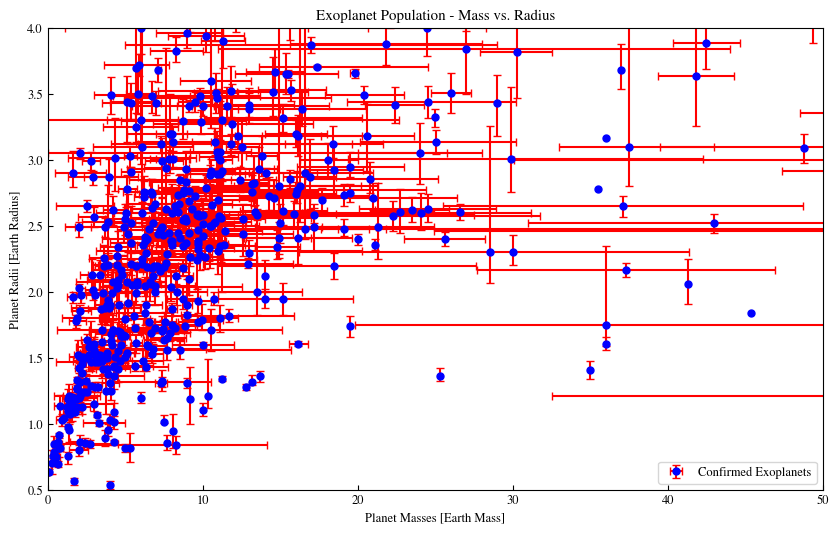

In [10]:
#Now we plot the Mass vs Radius plot, with limits.
fig = plt.figure(figsize = (10, 6))
plt.errorbar(planet_masses, planet_radii, 
             xerr = [np.abs(planet_mass_err2), planet_mass_err1], 
             yerr = [np.abs(planet_radii_err2), planet_radii_err1], 
             fmt = "o", color = "blue", ecolor = "red", capsize = 3, label = "Confirmed Exoplanets")
plt.xlabel("Planet Masses [Earth Mass]")
plt.ylabel("Planet Radii [Earth Radius]")
plt.title("Exoplanet Population - Mass vs. Radius")

#We setup the x and y limits.
plt.xlim(0,50)
plt.ylim(0.5,4.0)

plt.legend()
plt.show()

In [11]:
#Now we plot the Mass vs Radius plot, with limits.
# fig = plt.figure(figsize = (10, 6))
# plt.errorbar(planet_masses, planet_radii, 
#              xerr = [np.abs(planet_mass_err2), planet_mass_err1], 
#              yerr = [np.abs(planet_radii_err2), planet_radii_err1], 
#              fmt = "o", color = "blue", ecolor = "red", capsize = 3, label = "Confirmed Exoplanets")
# for i, name in enumerate(planet_names):
#     plt.text(planet_masses[i], planet_radii[i], name, fontsize=9, ha='right')
# plt.xlabel("Planet Masses [Earth Mass]")
# plt.ylabel("Planet Radii [Earth Radius]")
# plt.title("Exoplanet Population - Mass vs. Radius")

# #We setup the x and y limits.
# plt.xlim(0,50)
# plt.ylim(0.5,4.0)

# plt.legend()
# plt.show()

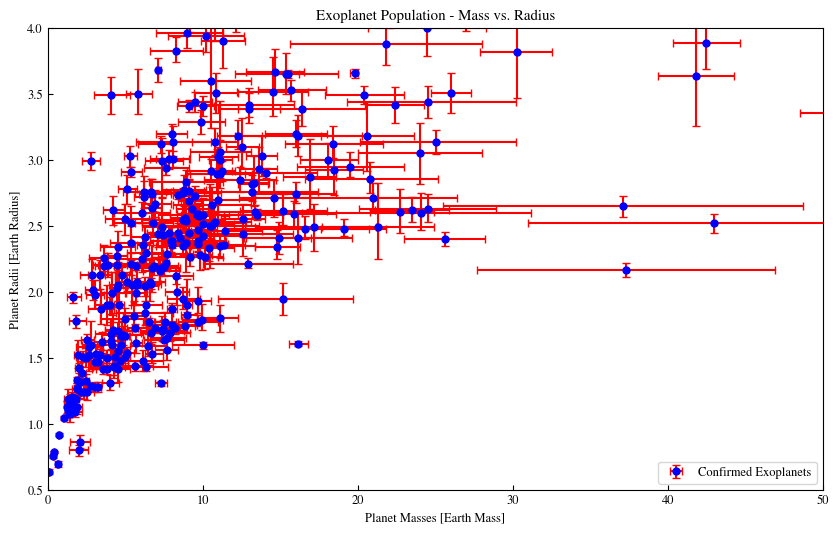

In [12]:
#Now we plot the Filtered Mass vs Radius plot, with limits.
fig = plt.figure(figsize = (10, 6))
plt.errorbar(planet_masses_filtered, planet_radii_filtered, 
             xerr = [np.abs(planet_mass_err2_filtered), planet_mass_err1_filtered], 
             yerr = [np.abs(planet_radii_err2_filtered), planet_radii_err1_filtered], 
             fmt = "o", color = "blue", ecolor = "red", capsize = 3, label = "Confirmed Exoplanets")
plt.xlabel("Planet Masses [Earth Mass]")
plt.ylabel("Planet Radii [Earth Radius]")
plt.title("Exoplanet Population - Mass vs. Radius")

#We setup the x and y limits.
plt.xlim(0,50)
plt.ylim(0.5,4.0)

plt.legend()
plt.show()

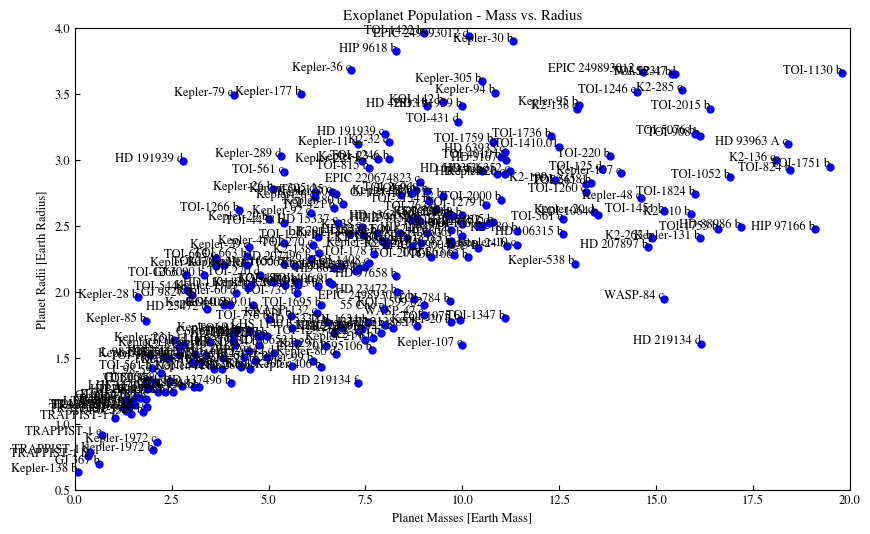

In [13]:
#Now we plot the Mass vs Radius plot, with limits.
fig = plt.figure(figsize = (10, 6))
plt.scatter(planet_masses_filtered, planet_radii_filtered, color='blue')
for i, name in enumerate(planet_names_filtered):
    if 0 <= planet_masses_filtered[i] <= 20 and 0.5 <= planet_radii_filtered[i] <= 4.0:
        plt.text(planet_masses_filtered[i], planet_radii_filtered[i], name, fontsize=9, ha='right')
plt.xlabel("Planet Masses [Earth Mass]")
plt.ylabel("Planet Radii [Earth Radius]")
plt.title("Exoplanet Population - Mass vs. Radius")

#We setup the x and y limits.
plt.xlim(0,20)
plt.ylim(0.5,4.0)

plt.show()

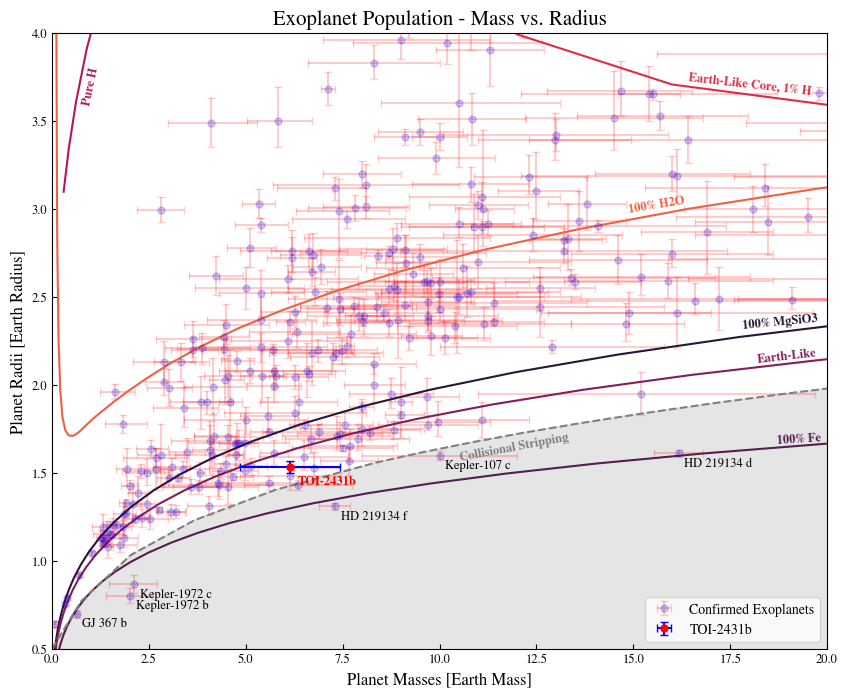

In [14]:
#We first define the colors we will use.
import seaborn as sns

colors = sns.color_palette("rocket", 8)

#Now we can add the Density Curves to our plot. (https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables)
#For this, we import the txt files that have the density curves.
mgsio_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusmgsio3.txt')
fe_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusFe.txt')
rocky_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusEarthlikeRocky.txt')
max_col_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusMaxCollisionStripping.txt')
pure_hydrogen = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiushydrogen.txt')

earth_like_one_h = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike1h2000K1mbar.txt')
all_h2o = np.loadtxt('../../data/toi2431_extra/Density Tables/massradius_100percentH2O_1000K_1mbar.txt')
earth_like_five_h2 = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike5h2000K1mbar.txt')

#Now we plot the Mass vs Radius plot with curves.
fig = plt.figure(figsize = (10, 8))

#We setup the x and y limits.
plt.xlim(0,20)
plt.ylim(0.5,4.0)

#We plot the known exoplanets.
#Note that since the err2 errors are negative (lower errors), we need to make them positive hence the np.abs.
plt.errorbar(planet_masses_filtered, planet_radii_filtered, 
             xerr = [np.abs(planet_mass_err2_filtered), planet_mass_err1_filtered], 
             yerr = [np.abs(planet_radii_err2_filtered), planet_radii_err1_filtered], 
             fmt = "o", color = "blue", ecolor = "red", alpha = 0.2, capsize = 3, label = "Confirmed Exoplanets")

#We plot the Mass-Radius Curves.
plt.plot(mgsio_curve[:, 0], mgsio_curve[:, 1], color = colors[0])
plt.text(17.8, 2.32, "100% MgSiO3", color = colors[0], rotation = 5.5, weight = "bold")

plt.plot(fe_curve[:, 0], fe_curve[:, 1], color = colors[1])
plt.text(18.7, 1.67, "100% Fe", color = colors[1], rotation = 3.5, weight = "bold")

plt.plot(rocky_curve[:, 0], rocky_curve[:, 1], color = colors[2])
plt.text(18.2, 2.13, "Earth-Like", color = colors[2], rotation = 6.5, weight = "bold")

plt.plot(max_col_curve[:, 0], max_col_curve[:, 1], "--", color = "grey")
plt.text(10.5, 1.57, "Collisional Stripping", color = "grey", rotation = 10.75, weight = "bold")
plt.fill_between(max_col_curve[:, 0], 0, max_col_curve[:, 1], color = "gray", alpha = 0.2)

plt.plot(pure_hydrogen[:, 0], pure_hydrogen[:, 1], color = colors[3])
plt.text(0.75, 3.6, "Pure H", color = colors[3], rotation = 78.25, weight = "bold")

plt.plot(earth_like_one_h[:, 0], earth_like_one_h[:, 1], color = colors[4])
plt.text(16.4, 3.65, "Earth-Like Core, 1% H", color = colors[4], rotation = -6.5, weight = "bold")

plt.plot(all_h2o[:, 0], all_h2o[:, 1], color = colors[5])
plt.text(14.85, 2.98, "100% H2O", color = colors[5], rotation = 9.5, weight = "bold")

plt.plot(earth_like_five_h2[:, 0], earth_like_five_h2[:, 1], color = colors[6])
#plt.text(35.5, 5.35, "Earth-Like Core, 5% H2", color = colors[6], rotation = -4, weight = "bold")

#We then plot our Planet, TOI-2431b.
#Note that we take the mass values from the analysis we have done in one of the cells above when converting from
#Jupiter Radius to Earth Radius.
#Radius Value taken from ExoFop!
plt.errorbar(mass, radius, xerr = [[lower_mass_err], [upper_mass_err]], 
             yerr = [[lower_rad_err],[upper_rad_err]], fmt = "o", 
             color = "red", ecolor = "blue", capsize = 3, label = "TOI-2431b")
plt.text(mass+0.2, radius-0.1, "TOI-2431b", color = "red", weight = "bold")

#We also add labels to similar planets to our target that have been well-studied before.
for i, name in enumerate(planet_names_filtered):
    if 0 <= planet_masses_filtered[i] <= 20 and 0.5 <= planet_radii_filtered[i] <= 4.0:
        if (name == "Kepler-107 c" or name == "HD 219134 f" or name == "HD 219134 d" or name == "Kepler-1972 c" or name == "Kepler-1972 b"
        or name == "GJ 367 b"):
            plt.text(planet_masses_filtered[i]+0.15, planet_radii_filtered[i]-0.09, name, fontsize=9, ha='left', va='bottom')
        
plt.xlabel("Planet Masses [Earth Mass]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("Exoplanet Population - Mass vs. Radius", fontsize = 15)

plt.legend(fontsize = 10)
#plt.savefig("toi_2431_massvsradius.png", dpi = 500)
plt.show()

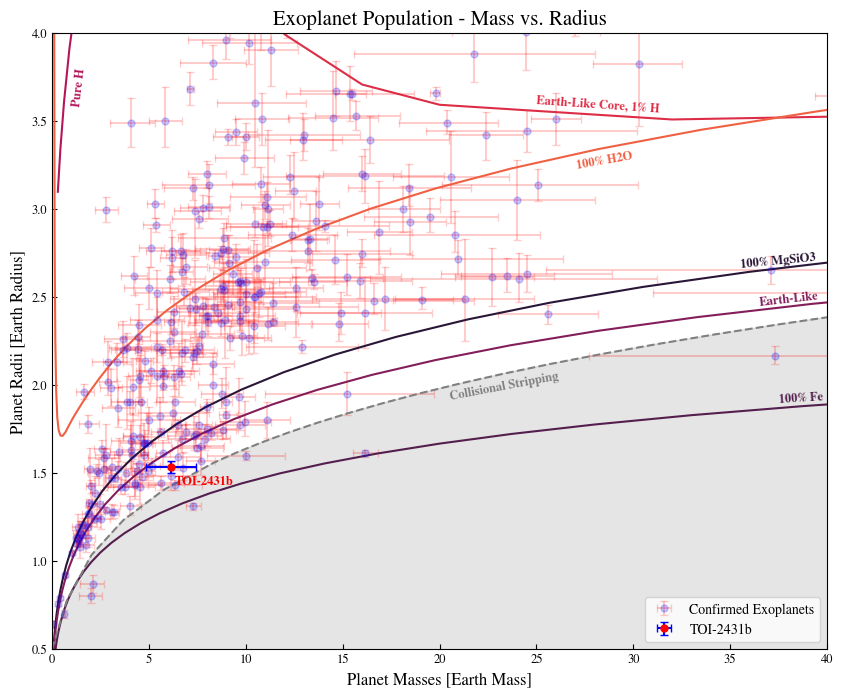

In [15]:
#We first define the colors we will use.
import seaborn as sns

colors = sns.color_palette("rocket", 8)

#Now we can add the Density Curves to our plot. (https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables)
#For this, we import the txt files that have the density curves.
mgsio_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusmgsio3.txt')
fe_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusFe.txt')
rocky_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusEarthlikeRocky.txt')
max_col_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusMaxCollisionStripping.txt')
pure_hydrogen = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiushydrogen.txt')

earth_like_one_h = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike1h2000K1mbar.txt')
all_h2o = np.loadtxt('../../data/toi2431_extra/Density Tables/massradius_100percentH2O_1000K_1mbar.txt')
earth_like_five_h2 = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike5h2000K1mbar.txt')

#Now we plot the Mass vs Radius plot with curves.
fig = plt.figure(figsize = (10, 8))

#We setup the x and y limits.
plt.xlim(0,40)
plt.ylim(0.5,4.0)

#We plot the known exoplanets.
#Note that since the err2 errors are negative (lower errors), we need to make them positive hence the np.abs.
plt.errorbar(planet_masses_filtered, planet_radii_filtered, 
             xerr = [np.abs(planet_mass_err2_filtered), planet_mass_err1_filtered], 
             yerr = [np.abs(planet_radii_err2_filtered), planet_radii_err1_filtered], 
             fmt = "o", color = "blue", ecolor = "red", alpha = 0.2, capsize = 3, label = "Confirmed Exoplanets")

#We plot the Mass-Radius Curves.
plt.plot(mgsio_curve[:, 0], mgsio_curve[:, 1], color = colors[0])
plt.text(35.5, 2.67, "100% MgSiO3", color = colors[0], rotation = 5.5, weight = "bold")

plt.plot(fe_curve[:, 0], fe_curve[:, 1], color = colors[1])
plt.text(37.5, 1.9, "100% Fe", color = colors[1], rotation = 3.5, weight = "bold")

plt.plot(rocky_curve[:, 0], rocky_curve[:, 1], color = colors[2])
plt.text(36.5, 2.45, "Earth-Like", color = colors[2], rotation = 6.5, weight = "bold")

plt.plot(max_col_curve[:, 0], max_col_curve[:, 1], "--", color = "grey")
plt.text(20.5, 1.92, "Collisional Stripping", color = "grey", rotation = 10.75, weight = "bold")
plt.fill_between(max_col_curve[:, 0], 0, max_col_curve[:, 1], color = "gray", alpha = 0.2)

plt.plot(pure_hydrogen[:, 0], pure_hydrogen[:, 1], color = colors[3])
plt.text(1.0, 3.6, "Pure H", color = colors[3], rotation = 83.25, weight = "bold")

plt.plot(earth_like_one_h[:, 0], earth_like_one_h[:, 1], color = colors[4])
plt.text(25, 3.55, "Earth-Like Core, 1% H", color = colors[4], rotation = -4, weight = "bold")

plt.plot(all_h2o[:, 0], all_h2o[:, 1], color = colors[5])
plt.text(27, 3.23, "100% H2O", color = colors[5], rotation = 10, weight = "bold")

plt.plot(earth_like_five_h2[:, 0], earth_like_five_h2[:, 1], color = colors[6])
#plt.text(35.5, 5.35, "Earth-Like Core, 5% H2", color = colors[6], rotation = -4, weight = "bold")

#We then plot our Planet, TOI-2431b.
#Note that we take the mass values from the analysis we have done in one of the cells above when converting from
#Jupiter Radius to Earth Radius.
#Radius Value taken from ExoFop!
plt.errorbar(mass, radius, xerr = [[lower_mass_err], [upper_mass_err]], 
             yerr = [[lower_rad_err],[upper_rad_err]], fmt = "o", 
             color = "red", ecolor = "blue", capsize = 3, label = "TOI-2431b")
plt.text(mass+0.2, radius-0.1, "TOI-2431b", color = "red", weight = "bold")

plt.xlabel("Planet Masses [Earth Mass]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("Exoplanet Population - Mass vs. Radius", fontsize = 15)

plt.legend(fontsize = 10)
#plt.savefig("toi_2431_massvsradius.png", dpi = 500)
plt.show()

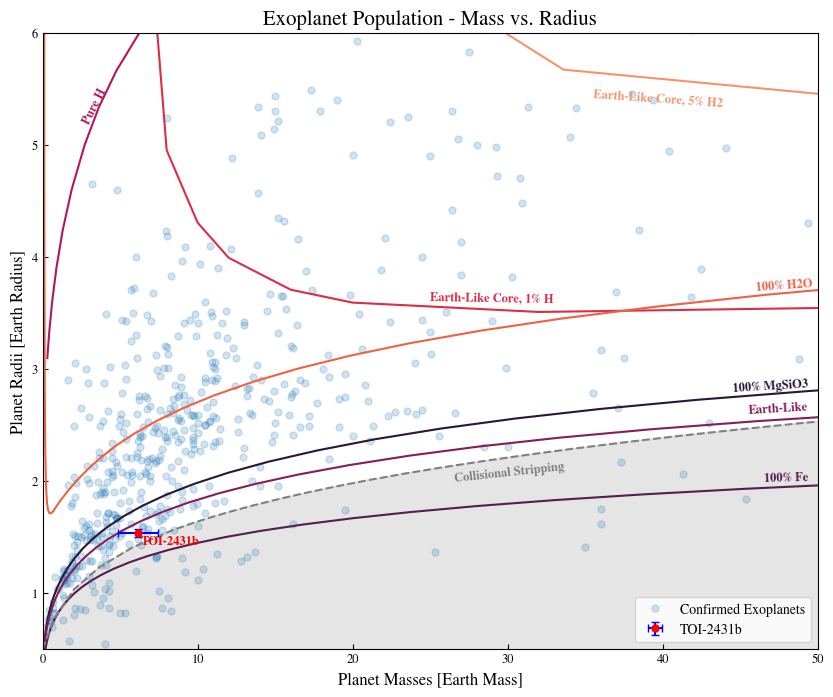

In [16]:
#We first define the colors we will use.
import seaborn as sns

colors = sns.color_palette("rocket", 8)

#Now we can add the Density Curves to our plot. (https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables)
#For this, we import the txt files that have the density curves.
mgsio_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusmgsio3.txt')
fe_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusFe.txt')
rocky_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusEarthlikeRocky.txt')
max_col_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusMaxCollisionStripping.txt')
pure_hydrogen = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiushydrogen.txt')

earth_like_one_h = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike1h2000K1mbar.txt')
all_h2o = np.loadtxt('../../data/toi2431_extra/Density Tables/massradius_100percentH2O_1000K_1mbar.txt')
earth_like_five_h2 = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike5h2000K1mbar.txt')

#Now we plot the Mass vs Radius plot with curves.
fig = plt.figure(figsize = (10, 8))

#We setup the x and y limits.
plt.xlim(0,50)
plt.ylim(0.5,6.0)

#We plot the known exoplanets.
plt.plot(planet_masses, planet_radii, "o", alpha = 0.2, label = "Confirmed Exoplanets")

#We plot the Mass-Radius Curves.
plt.plot(mgsio_curve[:, 0], mgsio_curve[:, 1], color = colors[0])
plt.text(44.5, 2.8, "100% MgSiO3", color = colors[0], rotation = 3.5, weight = "bold")

plt.plot(fe_curve[:, 0], fe_curve[:, 1], color = colors[1])
plt.text(46.5, 2.0, "100% Fe", color = colors[1], rotation = 1.5, weight = "bold")

plt.plot(rocky_curve[:, 0], rocky_curve[:, 1], color = colors[2])
plt.text(45.5, 2.6, "Earth-Like", color = colors[2], rotation = 3.5, weight = "bold")

plt.plot(max_col_curve[:, 0], max_col_curve[:, 1], "--", color = "grey")
plt.text(26.5, 2.0, "Collisional Stripping", color = "grey", rotation = 6.25, weight = "bold")
plt.fill_between(max_col_curve[:, 0], 0, max_col_curve[:, 1], color = "gray", alpha = 0.2)

plt.plot(pure_hydrogen[:, 0], pure_hydrogen[:, 1], color = colors[3])
plt.text(2.5, 5.2, "Pure H", color = colors[3], rotation = 63.25, weight = "bold")

plt.plot(earth_like_one_h[:, 0], earth_like_one_h[:, 1], color = colors[4])
plt.text(25, 3.6, "Earth-Like Core, 1% H", color = colors[4], rotation = -1, weight = "bold")

plt.plot(all_h2o[:, 0], all_h2o[:, 1], color = colors[5])
plt.text(46, 3.70, "100% H2O", color = colors[5], rotation = 4, weight = "bold")

plt.plot(earth_like_five_h2[:, 0], earth_like_five_h2[:, 1], color = colors[6])
plt.text(35.5, 5.35, "Earth-Like Core, 5% H2", color = colors[6], rotation = -4, weight = "bold")

#We then plot our Planet, TOI-2431b.
#Note that we take the mass values from the analysis we have done in one of the cells above when converting from
#Jupiter Radius to Earth Radius.
#Radius Value taken from ExoFop!
plt.errorbar(mass, radius, xerr = [[lower_mass_err], [upper_mass_err]], 
             yerr = [[lower_rad_err],[upper_rad_err]], fmt = "o", 
             color = "red", ecolor = "blue", capsize = 3, label = "TOI-2431b")
plt.text(mass+0.2, radius-0.1, "TOI-2431b", color = "red", weight = "bold")

plt.xlabel("Planet Masses [Earth Mass]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("Exoplanet Population - Mass vs. Radius", fontsize = 15)

plt.legend(fontsize = 10)
#plt.savefig("toi_2431_massvsradius.png", dpi = 500)
plt.show()

In [17]:
#Now we check all of the discovered exoplanets (so far) and our planet's location on it.
#This is called the Exoplanet Population plot.
#First, we get the list of the planets.
planetpop_file = '../../data/toi2431_extra/exoplanetpopulation.csv'
planetpop_df = pd.read_csv(planetpop_file, comment = "#")

#We then get the Names, Masses and the Radii as follows.
planetpop_names = planetpop_df["pl_name"]

#Orbital Period => [days]
planetpop_periods = planetpop_df["pl_orbper"]

#Radii => [Earth Radius]
planetpop_radii = planetpop_df["pl_rade"]

#Mass => [Earth Mass]
planetpop_mass = planetpop_df["pl_bmasse"]

# #We also need to get the Period of TOI-2431b by using the MCMC results.
# #For that, we first get the Posterior of the Period.
# period_value = df_medvals.loc[df_medvals['Labels'] == 'P_p1', 'values'].values[0]

# #We then extract the numbers and remove the $ and {} characters
# cleaned_str = period_value.replace('$', '').replace('{', '').replace('}', '').replace('_', '').replace('mp = ', '')

# #Now we have to split the string by the symbols into central, lower, and upper values
# central_value_per, lower_error_per, upper_error_per = cleaned_str.split('-')[0], cleaned_str.split('-')[1].split('+')[0], cleaned_str.split('+')[1]
# lower_error_per = lower_error_per.replace('^', '')
# upper_error_per = upper_error_per.replace('^', '')

# #We turn the strings into floats.
# central_value_per = float(central_value_per)
# lower_error_per = float(lower_error_per)
# upper_error_per = float(upper_error_per)

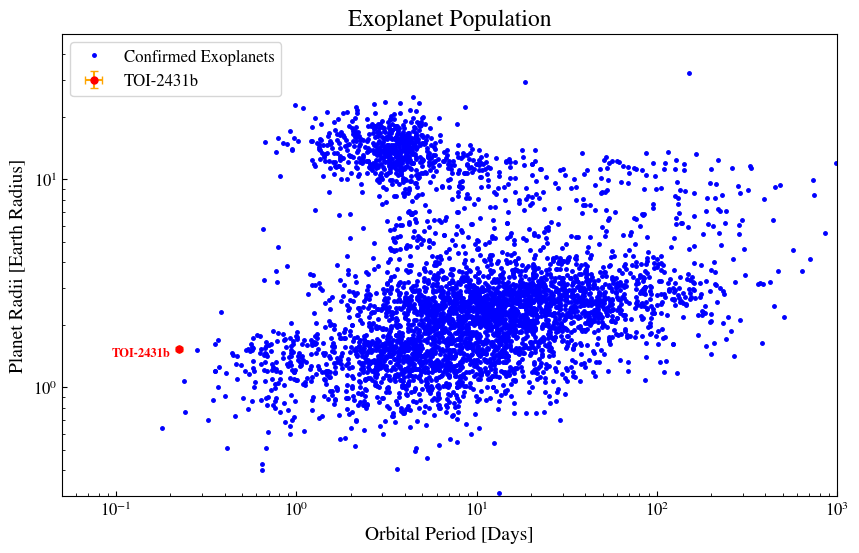

In [18]:
#Now we can plot the Exoplanet Population with our planet TOI-2431b. (Normal figsize = (10, 6))
fig = plt.figure(figsize = (10, 6))

#First we plot the Confirmed Exoplanets.
plt.plot(planetpop_periods, planetpop_radii, ".", color = "blue", label = "Confirmed Exoplanets")

#Then, we plot our planet TOI-2431b.
plt.errorbar(period, radius, xerr = [[lower_per_err], [upper_per_err]], 
             yerr = [[lower_rad_err], [upper_rad_err]], fmt = "o", color = "red", 
             ecolor = "orange", capsize = 3, label = "TOI-2431b")
plt.text(period-0.13, radius-0.12, "TOI-2431b", color = "red", weight = "bold", fontsize = 9)

plt.xlabel("Orbital Period [Days]", fontsize = 14)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 14)
plt.title("Exoplanet Population", fontsize = 17)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis = "x", which = "major", labelsize = 12)
plt.tick_params(axis = "y", which = "major", labelsize = 12)

#Note: We are putting limit to the periods to see the Hot Neptune Desert clearer.
plt.xlim(0.05, 1000)
plt.ylim(0.3, 50)
plt.legend(loc = "upper left", fontsize = 12)
#plt.savefig("toi_2431_radiusexopopulation.png", dpi = 500)
plt.show()

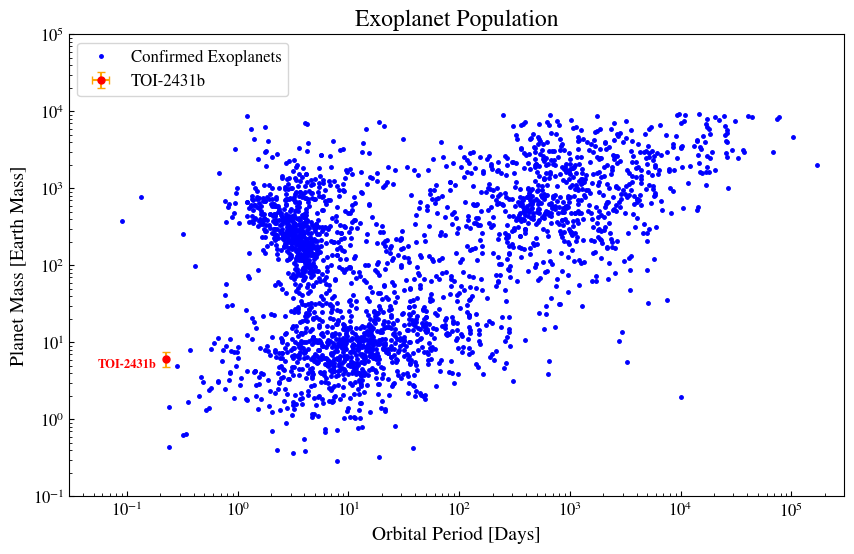

In [19]:
#Now we can plot the Exoplanet Population with our planet TOI-2431b. (Normal figsize = (10, 6))
fig = plt.figure(figsize = (10, 6))

#First we plot the Confirmed Exoplanets.
plt.plot(planetpop_periods, planetpop_mass, ".", color = "blue", label = "Confirmed Exoplanets")

#Then, we plot our planet TOI-2431b.
plt.errorbar(period, mass, xerr = [[lower_per_err], [upper_per_err]], 
             yerr = [[lower_mass_err], [upper_mass_err]], fmt = "o", color = "red", 
             ecolor = "orange", capsize = 3, label = "TOI-2431b")
plt.text(period-0.17, mass-1.5, "TOI-2431b", color = "red", weight = "bold", fontsize = 9)

plt.xlabel("Orbital Period [Days]", fontsize = 14)
plt.ylabel("Planet Mass [Earth Mass]", fontsize = 14)
plt.title("Exoplanet Population", fontsize = 17)
plt.xscale("log")
plt.yscale("log")
plt.tick_params(axis = "x", which = "major", labelsize = 12)
plt.tick_params(axis = "y", which = "major", labelsize = 12)

#Note: We are putting limit to the periods to see the Hot Neptune Desert clearer.
plt.xlim(0.03, 3e5)
plt.ylim(1e-1, 1e5)
plt.legend(loc = "upper left", fontsize = 12)
#plt.savefig("toi_2431_massexopopulation.png", dpi = 500)
plt.show()

In [20]:
# #Now we can plot the Exoplanet Population with our planet TOI-2431b. => Old Radius, from ExoFOP (wrong value).
# fig = plt.figure(figsize = (10, 6))

# #First we plot the Confirmed Exoplanets.
# plt.plot(planetpop_periods, planetpop_radii, ".", color = "blue", label = "Confirmed Exoplanets")

# #Then, we plot our planet TOI-2431b.
# plt.errorbar(central_value_per, 5.59553, xerr = [[lower_error_per], [upper_error_per]], yerr = 1.95546, fmt = "o", 
#              color = "red", ecolor = "orange", capsize = 3, label = "TOI-2431b")
# plt.text(0.080, 5.65, "TOI-2431b", color = "red", weight = "bold", fontsize = 9)

# plt.xlabel("Orbital Period [Days]", fontsize = 14)
# plt.ylabel("Planet Radii [Earth Radius]", fontsize = 14)
# plt.title("Exoplanet Population", fontsize = 17)
# plt.xscale("log")
# plt.yscale("log")
# plt.tick_params(axis = "x", which = "major", labelsize = 12)
# plt.tick_params(axis = "y", which = "major", labelsize = 12)

# #Note: We are putting limit to the periods to see the Hot Neptune Desert clearer.
# plt.xlim(0.05, 1000)
# plt.ylim(0.3, 50)
# plt.legend(loc = "upper left", fontsize = 12)
# #plt.savefig("old_toi_2431_exopopulation.png", dpi = 500)
# plt.show()

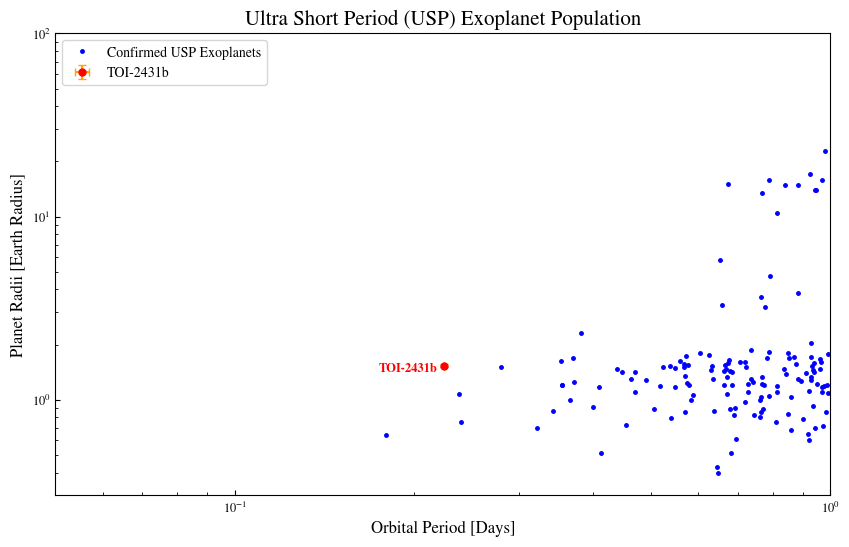

In [21]:
#We now check only the Ultra Short Period (USP) Planets to see whether our planet is the most massive USP.
planetpop_usp = planetpop_df[planetpop_df["pl_orbper"].values < 1]
fig = plt.figure(figsize = (10, 6))

#Now we plot all of the USP planets with our Planet.
plt.plot(planetpop_usp["pl_orbper"].values, planetpop_usp["pl_rade"].values, ".", color = "blue", 
         label = "Confirmed USP Exoplanets")

#Then, we plot our planet TOI-2431b.
plt.errorbar(period, radius, xerr = [[lower_per_err], [upper_per_err]], 
             yerr = [[lower_rad_err], [upper_rad_err]], fmt = "o", color = "red", 
             ecolor = "orange", capsize = 3, label = "TOI-2431b")
plt.text(period-0.05, radius-0.12, "TOI-2431b", color = "red", weight = "bold", fontsize = 9)

plt.xlabel("Orbital Period [Days]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("Ultra Short Period (USP) Exoplanet Population", fontsize = 15)
plt.xscale("log")
plt.yscale("log")

#Note: We are putting limit to the periods to see the Hot Neptune Desert clearer.
plt.xlim(0.05, 1)
plt.ylim(0.3, 100)
plt.legend(loc = "upper left", fontsize = 10)
#plt.savefig("toi_2431_USPexopopulation.png", dpi = 500)
plt.show()

In [22]:
#Now we import all the planets that have a confirmed mass and radius.
planet_file = '../../data/toi2431_extra/exoplanetpopulation.csv'
planet_df = pd.read_csv(planet_file, comment = "#")

#We then get the Names, Masses and the Radii as follows.
planet_names = planet_df["pl_name"]

#Masses => [Earth Masses]
planet_masses = planet_df["pl_bmasse"]
planet_mass_err1 = planet_df["pl_bmasseerr1"]
planet_mass_err2 = planet_df["pl_bmasseerr2"]

#Radii => [Earth Radius]
planet_radii = planet_df["pl_rade"]
planet_radii_err1 = planet_df["pl_radeerr1"]
planet_radii_err2 = planet_df["pl_radeerr2"]

####################################################################################################################

#We also filter the planets with uncertainties that are larger than %33 of the median value in radius or mass out of
#our dataset.
#For this, we get the upper and lower errors first.
planet_mass_err1_abs = planet_mass_err1.abs()
planet_mass_err2_abs = planet_mass_err2.abs()
planet_radius_err1_abs = planet_radii_err1.abs()
planet_radius_err2_abs = planet_radii_err2.abs()

#For this, we first calculate the TOTAL uncertainties for each planet, which is the average of positive and negative
#errors.
# planet_mass_uncertainty = (planet_mass_err1.abs() + planet_mass_err2.abs()) / 2
# planet_radius_uncertainty = (planet_radii_err1.abs() + planet_radii_err2.abs()) / 2

#We then calculate the threshold for the planets.
#In our case it is %33 of the median value i.e. %33 of its own mass and/or radius.
mass_threshold = 0.33 * planet_masses
radius_threshold = 0.33 * planet_radii

#We then filter the planets according to our thresholds, where the uncertainties are within these thresholds.
filtered_planets_df = planet_df[(planet_mass_err1_abs <= mass_threshold) & 
                                (planet_mass_err2_abs <= mass_threshold) &
                                (planet_radius_err1_abs <= radius_threshold) & 
                                (planet_radius_err2_abs <= radius_threshold)]
# filtered_planets_df = planet_df[(planet_mass_uncertainty <= mass_threshold) & 
#                                 (planet_radius_uncertainty <= radius_threshold)]

#We also filter the planets so that we only have USPs left.
filtered_planets_df = filtered_planets_df[filtered_planets_df["pl_orbper"].values < 1]

#We then reset the indices of the dataframe we are working with.
filtered_planets_df = filtered_planets_df.reset_index(drop = True)

#We then get the Names, Masses and the Radii as follows.
usppop_names = filtered_planets_df["pl_name"]

#Orbital Period => [days]
usppop_periods = filtered_planets_df["pl_orbper"]

#Radii => [Earth Radius]
usppop_radii = filtered_planets_df["pl_rade"]
usppop_radii_lower_err = filtered_planets_df["pl_radeerr2"]
usppop_radii_upper_err = filtered_planets_df["pl_radeerr1"]

#Mass => [Earth Mass]
usppop_mass = filtered_planets_df["pl_bmasse"]
usppop_mass_lower_err = filtered_planets_df["pl_bmasseerr2"]
usppop_mass_upper_err = filtered_planets_df["pl_bmasseerr1"]

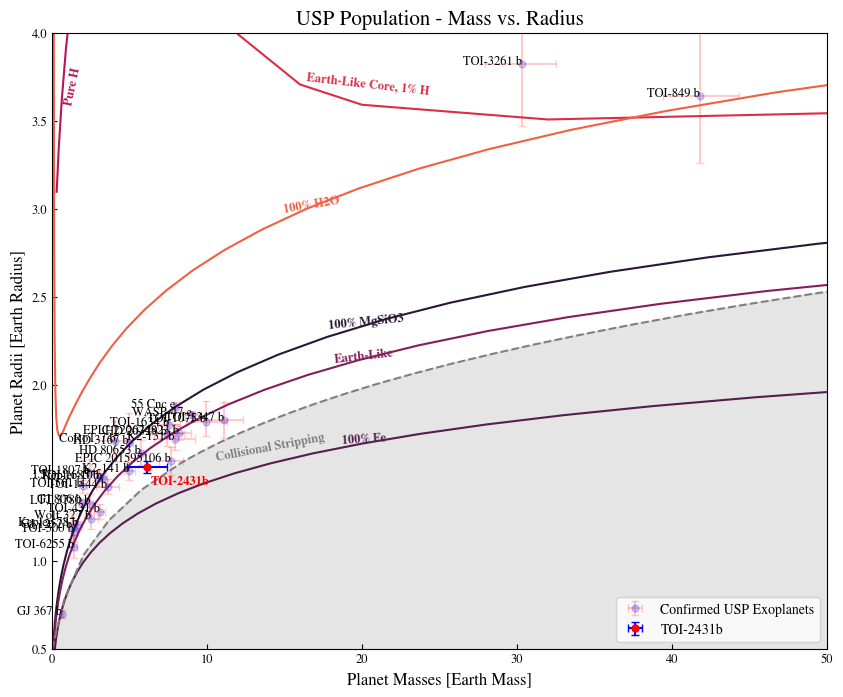

In [23]:
#We first define the colors we will use.
import seaborn as sns

colors = sns.color_palette("rocket", 8)

#Now we can add the Density Curves to our plot. (https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables)
#For this, we import the txt files that have the density curves.
mgsio_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusmgsio3.txt')
fe_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusFe.txt')
rocky_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusEarthlikeRocky.txt')
max_col_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusMaxCollisionStripping.txt')
pure_hydrogen = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiushydrogen.txt')

earth_like_one_h = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike1h2000K1mbar.txt')
all_h2o = np.loadtxt('../../data/toi2431_extra/Density Tables/massradius_100percentH2O_1000K_1mbar.txt')
earth_like_five_h2 = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike5h2000K1mbar.txt')

#Now we plot the Mass vs Radius plot with curves.
fig = plt.figure(figsize = (10, 8))

#We setup the x and y limits.
plt.xlim(0,50)
plt.ylim(0.5,4.0)

#We plot the known exoplanets.
#Note that since the err2 errors are negative (lower errors), we need to make them positive hence the np.abs.
#Now we plot all of the USP planets with our Planet.
plt.errorbar(usppop_mass, usppop_radii,
             xerr = [np.abs(usppop_mass_lower_err), usppop_mass_upper_err], 
             yerr = [np.abs(usppop_radii_lower_err), usppop_radii_upper_err],
             fmt = "o", color = "blue", ecolor = "red", alpha = 0.2, capsize = 3, label = "Confirmed USP Exoplanets")

for i, name in enumerate(usppop_names):
    if 0 <= usppop_mass[i] <= 50 and 0.5 <= usppop_radii[i] <= 4.0:
        plt.text(usppop_mass[i], usppop_radii[i], name, fontsize=9, ha='right')

#We plot the Mass-Radius Curves.
plt.plot(mgsio_curve[:, 0], mgsio_curve[:, 1], color = colors[0])
plt.text(17.8, 2.32, "100% MgSiO3", color = colors[0], rotation = 5.5, weight = "bold")

plt.plot(fe_curve[:, 0], fe_curve[:, 1], color = colors[1])
plt.text(18.7, 1.67, "100% Fe", color = colors[1], rotation = 3.5, weight = "bold")

plt.plot(rocky_curve[:, 0], rocky_curve[:, 1], color = colors[2])
plt.text(18.2, 2.13, "Earth-Like", color = colors[2], rotation = 6.5, weight = "bold")

plt.plot(max_col_curve[:, 0], max_col_curve[:, 1], "--", color = "grey")
plt.text(10.5, 1.57, "Collisional Stripping", color = "grey", rotation = 10.75, weight = "bold")
plt.fill_between(max_col_curve[:, 0], 0, max_col_curve[:, 1], color = "gray", alpha = 0.2)

plt.plot(pure_hydrogen[:, 0], pure_hydrogen[:, 1], color = colors[3])
plt.text(0.75, 3.6, "Pure H", color = colors[3], rotation = 78.25, weight = "bold")

plt.plot(earth_like_one_h[:, 0], earth_like_one_h[:, 1], color = colors[4])
plt.text(16.4, 3.65, "Earth-Like Core, 1% H", color = colors[4], rotation = -6.5, weight = "bold")

plt.plot(all_h2o[:, 0], all_h2o[:, 1], color = colors[5])
plt.text(14.85, 2.98, "100% H2O", color = colors[5], rotation = 9.5, weight = "bold")

plt.plot(earth_like_five_h2[:, 0], earth_like_five_h2[:, 1], color = colors[6])
#plt.text(35.5, 5.35, "Earth-Like Core, 5% H2", color = colors[6], rotation = -4, weight = "bold")

#We then plot our Planet, TOI-2431b.
#Note that we take the mass values from the analysis we have done in one of the cells above when converting from
#Jupiter Radius to Earth Radius.
#Radius Value taken from ExoFop!
plt.errorbar(mass, radius, xerr = [[lower_mass_err], [upper_mass_err]], 
             yerr = [[lower_rad_err],[upper_rad_err]], fmt = "o", 
             color = "red", ecolor = "blue", capsize = 3, label = "TOI-2431b")
plt.text(mass+0.2, radius-0.1, "TOI-2431b", color = "red", weight = "bold")

plt.xlabel("Planet Masses [Earth Mass]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("USP Population - Mass vs. Radius", fontsize = 15)

plt.legend(fontsize = 10)
#plt.savefig("toi_2431_massvsradius.png", dpi = 500)
plt.show()

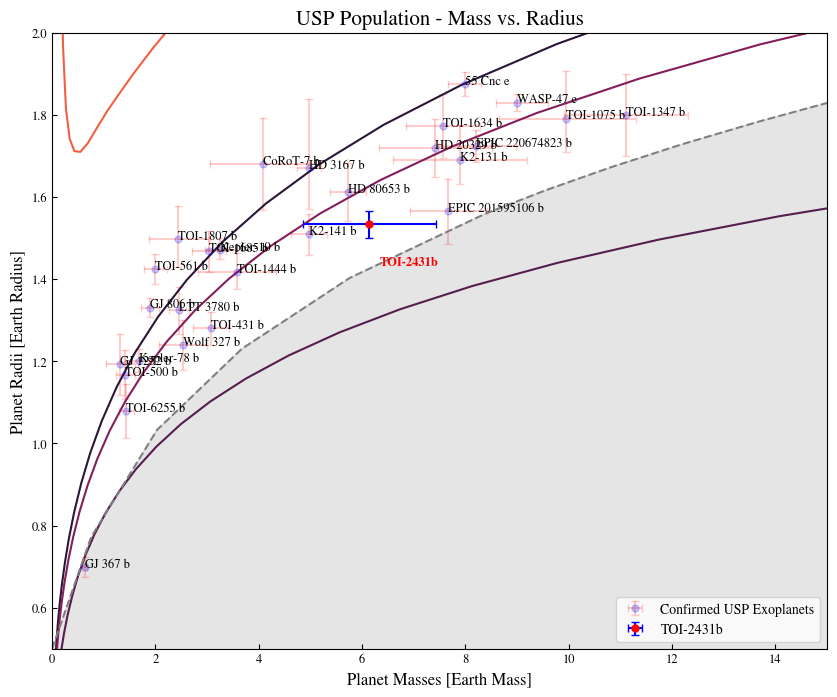

In [24]:
#We first define the colors we will use.
import seaborn as sns

colors = sns.color_palette("rocket", 8)

#Now we can add the Density Curves to our plot. (https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables)
#For this, we import the txt files that have the density curves.
mgsio_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusmgsio3.txt')
fe_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusFe.txt')
rocky_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusEarthlikeRocky.txt')
max_col_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusMaxCollisionStripping.txt')
pure_hydrogen = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiushydrogen.txt')

earth_like_one_h = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike1h2000K1mbar.txt')
all_h2o = np.loadtxt('../../data/toi2431_extra/Density Tables/massradius_100percentH2O_1000K_1mbar.txt')
earth_like_five_h2 = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike5h2000K1mbar.txt')

#Now we plot the Mass vs Radius plot with curves.
fig = plt.figure(figsize = (10, 8))

#We setup the x and y limits.
plt.xlim(0,15)
plt.ylim(0.5,2.0)

#We plot the known exoplanets.
#Note that since the err2 errors are negative (lower errors), we need to make them positive hence the np.abs.
#Now we plot all of the USP planets with our Planet.
plt.errorbar(usppop_mass, usppop_radii,
             xerr = [np.abs(usppop_mass_lower_err), usppop_mass_upper_err], 
             yerr = [np.abs(usppop_radii_lower_err), usppop_radii_upper_err],
             fmt = "o", color = "blue", ecolor = "red", alpha = 0.2, capsize = 3, label = "Confirmed USP Exoplanets")

for i, name in enumerate(usppop_names):
    if 0 <= usppop_mass[i] <= 15 and 0.5 <= usppop_radii[i] <= 2.0:
        plt.text(usppop_mass[i], usppop_radii[i], name, fontsize=9, ha='left')

#We plot the Mass-Radius Curves.
plt.plot(mgsio_curve[:, 0], mgsio_curve[:, 1], color = colors[0])
#plt.text(17.8, 2.32, "100% MgSiO3", color = colors[0], rotation = 5.5, weight = "bold")

plt.plot(fe_curve[:, 0], fe_curve[:, 1], color = colors[1])
#plt.text(18.7, 1.67, "100% Fe", color = colors[1], rotation = 3.5, weight = "bold")

plt.plot(rocky_curve[:, 0], rocky_curve[:, 1], color = colors[2])
#plt.text(18.2, 2.13, "Earth-Like", color = colors[2], rotation = 6.5, weight = "bold")

plt.plot(max_col_curve[:, 0], max_col_curve[:, 1], "--", color = "grey")
#plt.text(10.5, 1.57, "Collisional Stripping", color = "grey", rotation = 10.75, weight = "bold")
plt.fill_between(max_col_curve[:, 0], 0, max_col_curve[:, 1], color = "gray", alpha = 0.2)

plt.plot(pure_hydrogen[:, 0], pure_hydrogen[:, 1], color = colors[3])
#plt.text(0.75, 3.6, "Pure H", color = colors[3], rotation = 78.25, weight = "bold")

plt.plot(earth_like_one_h[:, 0], earth_like_one_h[:, 1], color = colors[4])
#plt.text(16.4, 3.65, "Earth-Like Core, 1% H", color = colors[4], rotation = -6.5, weight = "bold")

plt.plot(all_h2o[:, 0], all_h2o[:, 1], color = colors[5])
#plt.text(14.85, 2.98, "100% H2O", color = colors[5], rotation = 9.5, weight = "bold")

plt.plot(earth_like_five_h2[:, 0], earth_like_five_h2[:, 1], color = colors[6])
#plt.text(35.5, 5.35, "Earth-Like Core, 5% H2", color = colors[6], rotation = -4, weight = "bold")

#We then plot our Planet, TOI-2431b.
#Note that we take the mass values from the analysis we have done in one of the cells above when converting from
#Jupiter Radius to Earth Radius.
#Radius Value taken from ExoFop!
plt.errorbar(mass, radius, xerr = [[lower_mass_err], [upper_mass_err]], 
             yerr = [[lower_rad_err],[upper_rad_err]], fmt = "o", 
             color = "red", ecolor = "blue", capsize = 3, label = "TOI-2431b")
plt.text(mass+0.2, radius-0.1, "TOI-2431b", color = "red", weight = "bold")

plt.xlabel("Planet Masses [Earth Mass]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("USP Population - Mass vs. Radius", fontsize = 15)

plt.legend(fontsize = 10)
#plt.savefig("toi_2431_massvsradius.png", dpi = 500)
plt.show()

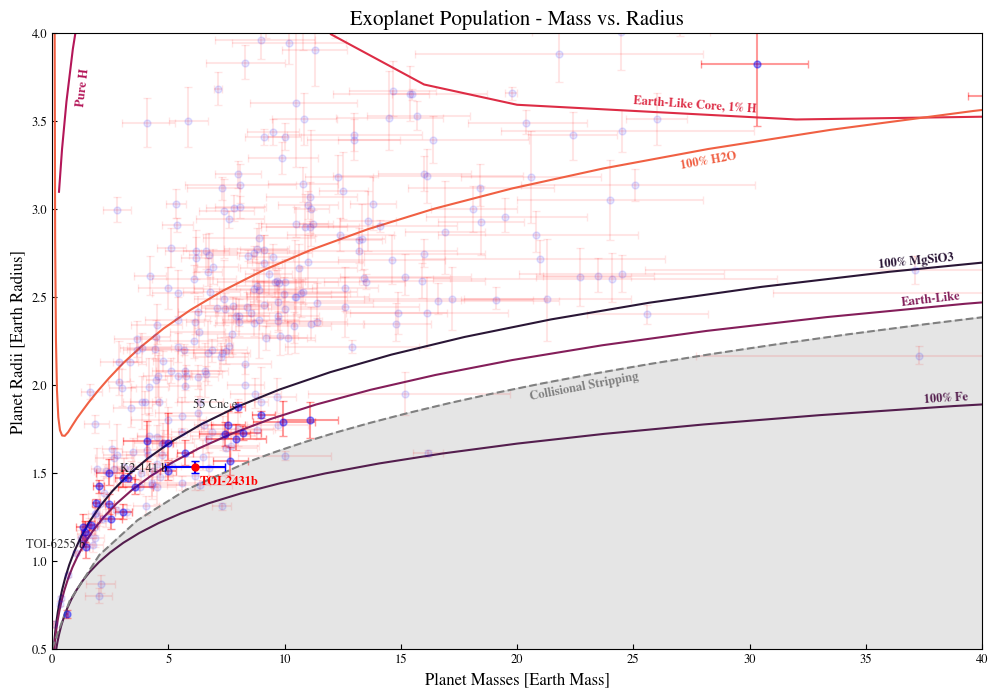

In [42]:
#We first define the colors we will use.
import seaborn as sns

colors = sns.color_palette("rocket", 8)

#Now we can add the Density Curves to our plot. (https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables)
#For this, we import the txt files that have the density curves.
mgsio_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusmgsio3.txt')
fe_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusFe.txt')
rocky_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusEarthlikeRocky.txt')
max_col_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusMaxCollisionStripping.txt')
pure_hydrogen = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiushydrogen.txt')

earth_like_one_h = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike1h2000K1mbar.txt')
all_h2o = np.loadtxt('../../data/toi2431_extra/Density Tables/massradius_100percentH2O_1000K_1mbar.txt')
earth_like_five_h2 = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike5h2000K1mbar.txt')

#Now we plot the Mass vs Radius plot with curves.
fig = plt.figure(figsize = (12, 8))

#We setup the x and y limits.
plt.xlim(0,40)
plt.ylim(0.5,4.0)

#We plot the known exoplanets.
#Note that since the err2 errors are negative (lower errors), we need to make them positive hence the np.abs.
for i, name in enumerate(planet_names_filtered):
    if (planet_periods_filtered[i] < 1):
        #We plot the USPs more opaque.
        plt.errorbar(planet_masses_filtered[i], planet_radii_filtered[i], 
                     xerr = [[np.abs(planet_mass_err2_filtered[i])], [planet_mass_err1_filtered[i]]], 
                     yerr = [[np.abs(planet_radii_err2_filtered[i])], [planet_radii_err1_filtered[i]]], 
                     fmt = "o", color = "blue", ecolor = "red", alpha = 0.4, capsize = 3, label = "Ultra-Short Period Exoplanets")

        if (name == "K2-141 b" or name == "TOI-6255 b" or name == "55 Cnc e"):
            plt.text(planet_masses_filtered[i], planet_radii_filtered[i], name, ha='right', alpha = 0.8)

    else:
        plt.errorbar(planet_masses_filtered[i], planet_radii_filtered[i], 
                     xerr = [[np.abs(planet_mass_err2_filtered[i])], [planet_mass_err1_filtered[i]]], 
                     yerr = [[np.abs(planet_radii_err2_filtered[i])], [planet_radii_err1_filtered[i]]],
                     fmt = "o", color = "blue", ecolor = "red", alpha = 0.1, capsize = 3, label = "Confirmed Exoplanets")

#We plot the Mass-Radius Curves.
plt.plot(mgsio_curve[:, 0], mgsio_curve[:, 1], color = colors[0])
plt.text(35.5, 2.67, "100% MgSiO3", color = colors[0], rotation = 5.5, weight = "bold")

plt.plot(fe_curve[:, 0], fe_curve[:, 1], color = colors[1])
plt.text(37.5, 1.9, "100% Fe", color = colors[1], rotation = 3.5, weight = "bold")

plt.plot(rocky_curve[:, 0], rocky_curve[:, 1], color = colors[2])
plt.text(36.5, 2.45, "Earth-Like", color = colors[2], rotation = 6.5, weight = "bold")

plt.plot(max_col_curve[:, 0], max_col_curve[:, 1], "--", color = "grey")
plt.text(20.5, 1.92, "Collisional Stripping", color = "grey", rotation = 10.75, weight = "bold")
plt.fill_between(max_col_curve[:, 0], 0, max_col_curve[:, 1], color = "gray", alpha = 0.2)

plt.plot(pure_hydrogen[:, 0], pure_hydrogen[:, 1], color = colors[3])
plt.text(1.0, 3.6, "Pure H", color = colors[3], rotation = 83.25, weight = "bold")

plt.plot(earth_like_one_h[:, 0], earth_like_one_h[:, 1], color = colors[4])
plt.text(25, 3.55, "Earth-Like Core, 1% H", color = colors[4], rotation = -4, weight = "bold")

plt.plot(all_h2o[:, 0], all_h2o[:, 1], color = colors[5])
plt.text(27, 3.23, "100% H2O", color = colors[5], rotation = 10, weight = "bold")

plt.plot(earth_like_five_h2[:, 0], earth_like_five_h2[:, 1], color = colors[6])
#plt.text(35.5, 5.35, "Earth-Like Core, 5% H2", color = colors[6], rotation = -4, weight = "bold")

#We then plot our Planet, TOI-2431b.
#Note that we take the mass values from the analysis we have done in one of the cells above when converting from
#Jupiter Radius to Earth Radius.
#Radius Value taken from ExoFop!
plt.errorbar(mass, radius, xerr = [[lower_mass_err], [upper_mass_err]], 
             yerr = [[lower_rad_err],[upper_rad_err]], fmt = "o", 
             color = "red", ecolor = "blue", capsize = 3, label = "TOI-2431b")
plt.text(mass+0.2, radius-0.1, "TOI-2431b", color = "red", weight = "bold")

plt.xlabel("Planet Masses [Earth Mass]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("Exoplanet Population - Mass vs. Radius", fontsize = 15)

#plt.legend(fontsize = 10)
#plt.savefig("toi_2431_massvsradius.png", dpi = 500)
plt.show()

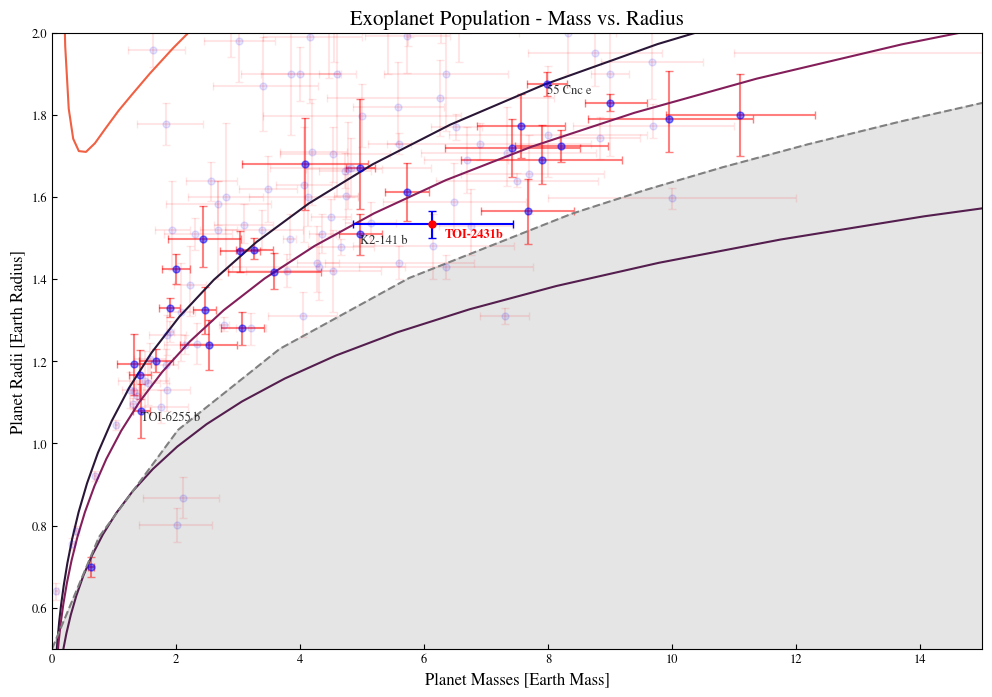

In [51]:
#We first define the colors we will use.
import seaborn as sns

colors = sns.color_palette("rocket", 8)

#Now we can add the Density Curves to our plot. (https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables)
#For this, we import the txt files that have the density curves.
mgsio_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusmgsio3.txt')
fe_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusFe.txt')
rocky_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusEarthlikeRocky.txt')
max_col_curve = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiusMaxCollisionStripping.txt')
pure_hydrogen = np.loadtxt('../../data/toi2431_extra/Density Tables/massradiushydrogen.txt')

earth_like_one_h = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike1h2000K1mbar.txt')
all_h2o = np.loadtxt('../../data/toi2431_extra/Density Tables/massradius_100percentH2O_1000K_1mbar.txt')
earth_like_five_h2 = np.loadtxt('../../data/toi2431_extra/Density Tables/Earthlike5h2000K1mbar.txt')

#Now we plot the Mass vs Radius plot with curves.
fig = plt.figure(figsize = (12, 8))

#We setup the x and y limits.
plt.xlim(0,15)
plt.ylim(0.5,2.0)

#We plot the known exoplanets.
#Note that since the err2 errors are negative (lower errors), we need to make them positive hence the np.abs.
for i, name in enumerate(planet_names_filtered):
    if (planet_periods_filtered[i] < 1):
        #We plot the USPs more opaque.
        plt.errorbar(planet_masses_filtered[i], planet_radii_filtered[i], 
                     xerr = [[np.abs(planet_mass_err2_filtered[i])], [planet_mass_err1_filtered[i]]], 
                     yerr = [[np.abs(planet_radii_err2_filtered[i])], [planet_radii_err1_filtered[i]]], 
                     fmt = "o", color = "blue", ecolor = "red", alpha = 0.5, capsize = 3, label = "Ultra-Short Period Exoplanets")

        if (name == "K2-141 b" or name == "TOI-6255 b" or name == "55 Cnc e"):
            plt.text(planet_masses_filtered[i], planet_radii_filtered[i], name, ha='left', va = "top", alpha = 0.8)

    else:
        plt.errorbar(planet_masses_filtered[i], planet_radii_filtered[i], 
                     xerr = [[np.abs(planet_mass_err2_filtered[i])], [planet_mass_err1_filtered[i]]], 
                     yerr = [[np.abs(planet_radii_err2_filtered[i])], [planet_radii_err1_filtered[i]]],
                     fmt = "o", color = "blue", ecolor = "red", alpha = 0.1, capsize = 3, label = "Confirmed Exoplanets")

#We plot the Mass-Radius Curves.
plt.plot(mgsio_curve[:, 0], mgsio_curve[:, 1], color = colors[0])
#plt.text(17.8, 2.32, "100% MgSiO3", color = colors[0], rotation = 5.5, weight = "bold")

plt.plot(fe_curve[:, 0], fe_curve[:, 1], color = colors[1])
#plt.text(18.7, 1.67, "100% Fe", color = colors[1], rotation = 3.5, weight = "bold")

plt.plot(rocky_curve[:, 0], rocky_curve[:, 1], color = colors[2])
#plt.text(18.2, 2.13, "Earth-Like", color = colors[2], rotation = 6.5, weight = "bold")

plt.plot(max_col_curve[:, 0], max_col_curve[:, 1], "--", color = "grey")
#plt.text(10.5, 1.57, "Collisional Stripping", color = "grey", rotation = 10.75, weight = "bold")
plt.fill_between(max_col_curve[:, 0], 0, max_col_curve[:, 1], color = "gray", alpha = 0.2)

plt.plot(pure_hydrogen[:, 0], pure_hydrogen[:, 1], color = colors[3])
#plt.text(0.75, 3.6, "Pure H", color = colors[3], rotation = 78.25, weight = "bold")

plt.plot(earth_like_one_h[:, 0], earth_like_one_h[:, 1], color = colors[4])
#plt.text(16.4, 3.65, "Earth-Like Core, 1% H", color = colors[4], rotation = -6.5, weight = "bold")

plt.plot(all_h2o[:, 0], all_h2o[:, 1], color = colors[5])
#plt.text(14.85, 2.98, "100% H2O", color = colors[5], rotation = 9.5, weight = "bold")

plt.plot(earth_like_five_h2[:, 0], earth_like_five_h2[:, 1], color = colors[6])
#plt.text(35.5, 5.35, "Earth-Like Core, 5% H2", color = colors[6], rotation = -4, weight = "bold")

#We then plot our Planet, TOI-2431b.
#Note that we take the mass values from the analysis we have done in one of the cells above when converting from
#Jupiter Radius to Earth Radius.
#Radius Value taken from ExoFop!
plt.errorbar(mass, radius, xerr = [[lower_mass_err], [upper_mass_err]], 
             yerr = [[lower_rad_err],[upper_rad_err]], fmt = "o", 
             color = "red", ecolor = "blue", capsize = 3, label = "TOI-2431b")
plt.text(mass+0.2, radius-0.03, "TOI-2431b", color = "red", weight = "bold")

plt.xlabel("Planet Masses [Earth Mass]", fontsize = 12)
plt.ylabel("Planet Radii [Earth Radius]", fontsize = 12)
plt.title("Exoplanet Population - Mass vs. Radius", fontsize = 15)

#plt.legend(fontsize = 10)
#plt.savefig("toi_2431_massvsradius.png", dpi = 500)
plt.show()

In [ ]:
#We get the Semi-Amplitude from the Chains.
obj_p = df_medvals[df_medvals.Labels=='K_p1']['values'].values[0]

#We then extract the numbers and remove the $ and {} characters
cleaned_str_p = obj.replace('$', '').replace('{', '').replace('}', '').replace('_', '').replace('K_p1 = ', '')

#Now we have to split the string by the symbols into central, lower, and upper values
central_value_p, lower_error_p, upper_error_p = cleaned_str_p.split('-')[0], cleaned_str_p.split('-')[1].split('+')[0], cleaned_str_p.split('+')[1]
lower_error_p = lower_error_p.replace('^', '')
upper_error_p = upper_error_p.replace('^', '')

#We convert the strings to floats to obtain the results.
central_value_p, lower_error_p, upper_error_p = float(central_value_p), float(lower_error_p), float(upper_error_p)

central_value_p, lower_error_p, upper_error_p